In [1]:
import sys
sys.path.append('../')

%load_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from skimage.io import imread

from gen.load_data import load_data

In [3]:
from sklearn.utils import shuffle

train_df, valid_df, test_df = load_data('../data')

train_df = shuffle(train_df)
valid_df = shuffle(valid_df)

print(train_df.head())


                                                image                   id  \
3411  ../data/Train/CameraRGB/episode_0001_000165.png  episode_0001_000165   
988   ../data/Train/CameraRGB/episode_0004_000021.png  episode_0004_000021   
4239  ../data/Train/CameraRGB/episode_0005_000190.png  episode_0005_000190   
2988  ../data/Train/CameraRGB/episode_0013_000220.png  episode_0013_000220   
3715  ../data/Train/CameraRGB/episode_0006_000224.png  episode_0006_000224   

                                                label  
3411  ../data/Train/CameraSeg/episode_0001_000165.png  
988   ../data/Train/CameraSeg/episode_0004_000021.png  
4239  ../data/Train/CameraSeg/episode_0005_000190.png  
2988  ../data/Train/CameraSeg/episode_0013_000220.png  
3715  ../data/Train/CameraSeg/episode_0006_000224.png  


In [4]:
from models.fcn8 import model_fcn8

model = model_fcn8(3, image_shape=(384, 384, 3), keep_prob=0.5)
model.summary()

/home/faisal/anaconda3/envs/ai/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 384, 384, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 384, 384, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 384, 384, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 192, 192, 64) 0           block1_conv2[0][0]               
__________________________________________________________________________________________________
block2_con

In [5]:
from gen.generators import train_and_lab_gen_func, test_and_lab_gen_func

BATCH_SIZE = 32
model_dir = '../saved_models/fcn8LowRes/'

train_gen = train_and_lab_gen_func(train_df, image_size=(600, 800), target_size=(384, 384), batch_size = BATCH_SIZE)
valid_gen = test_and_lab_gen_func(valid_df, image_size=(600, 800), target_size=(384, 384), batch_size = BATCH_SIZE)
# test_gen = train_and_lab_gen_func(test_df, image_size=(600, 800),  target_size=(480, 480),  batch_size = BATCH_SIZE)

In [6]:
from train import weighted_categorical_crossentropy
from keras.utils.training_utils import multi_gpu_model

weights = np.array([10, 5, 1])

gpus = 2

model_gpu = multi_gpu_model(model, gpus)
# model_gpu.load_weights('../saved_models/fcn8_extended_training/model.hdf5')
model_gpu.compile(loss=weighted_categorical_crossentropy(weights),
              optimizer='adam',
              metrics=['accuracy'])


In [7]:
from train import train_nn

m = train_df.shape[0]
history = train_nn(model_gpu, 
                   train_gen, 
                   valid_gen, 
                   training_size=m, 
                   batch_size=BATCH_SIZE,
                   validation_size=valid_df.shape[0],
                   output_path=model_dir, 
                   epochs=100,
                  gpus = 2)

/home/faisal/anaconda3/envs/ai/lib/python3.6/site-packages/keras/engine/training.py:2095: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
## Ignore next message from keras, values are replaced anyways
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
## Ignore next message from keras, values are replaced anyways
## Ignore next message from keras, values are replaced anyways
Reinserting dataframe: 500 images
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
## Ignore next message from keras, values are replaced anyways
Reinserting dataframe: 500 images
Found 0 images belonging to 0 classes.
## Ignore next message from keras, values are replaced anyways
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0

75/75 [==============================] - 162s 2s/step - loss: 0.1294 - acc: 0.9838 - val_loss: 0.1736 - val_acc: 0.9841

Epoch 00027: val_loss improved from 0.19185 to 0.17364, saving model to ../saved_models/fcn8LowRes//model.hdf5
Epoch 28/100
75/75 [==============================] - 159s 2s/step - loss: 0.1170 - acc: 0.9839 - val_loss: 0.1887 - val_acc: 0.9836

Epoch 00028: val_loss did not improve
Epoch 29/100
75/75 [==============================] - 166s 2s/step - loss: 0.1115 - acc: 0.9840 - val_loss: 0.1740 - val_acc: 0.9833

Epoch 00029: val_loss did not improve
Epoch 30/100
75/75 [==============================] - 167s 2s/step - loss: 0.1076 - acc: 0.9840 - val_loss: 0.1567 - val_acc: 0.9838

Epoch 00030: val_loss improved from 0.17364 to 0.15669, saving model to ../saved_models/fcn8LowRes//model.hdf5
Epoch 31/100
75/75 [==============================] - 161s 2s/step - loss: 0.1030 - acc: 0.9842 - val_loss: 0.1613 - val_acc: 0.9855

Epoch 00031: val_loss did not improve
Epoch 3


Epoch 00071: val_loss did not improve
Epoch 72/100
75/75 [==============================] - 165s 2s/step - loss: 0.0728 - acc: 0.9849 - val_loss: 0.1276 - val_acc: 0.9855

Epoch 00072: val_loss did not improve
Epoch 73/100
75/75 [==============================] - 161s 2s/step - loss: 0.0742 - acc: 0.9847 - val_loss: 0.1102 - val_acc: 0.9857

Epoch 00073: val_loss improved from 0.11160 to 0.11017, saving model to ../saved_models/fcn8LowRes//model.hdf5
Epoch 74/100
75/75 [==============================] - 161s 2s/step - loss: 0.0733 - acc: 0.9849 - val_loss: 0.1423 - val_acc: 0.9833

Epoch 00074: val_loss did not improve
Epoch 75/100
75/75 [==============================] - 164s 2s/step - loss: 0.0733 - acc: 0.9850 - val_loss: 0.1293 - val_acc: 0.9839

Epoch 00075: val_loss did not improve
Epoch 76/100
75/75 [==============================] - 164s 2s/step - loss: 0.0740 - acc: 0.9848 - val_loss: 0.1465 - val_acc: 0.9868

Epoch 00076: val_loss did not improve
Epoch 77/100
75/75 [========

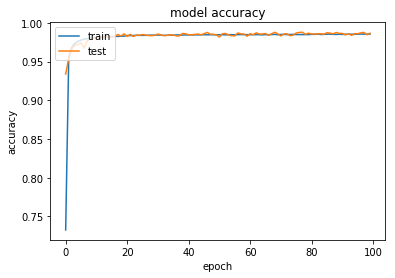

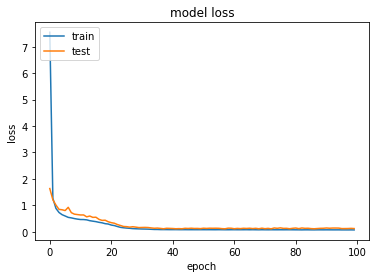

In [8]:
# # summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
model.save('../saved_models/fcn8LowRes/model_saved.h5')

In [ ]:
#valid_gen = train_and_lab_gen_func(valid_df, image_size=(600, 800), target_size=(480, 480), batch_size = BATCH_SIZE * gpus)
#test_gen = train_and_lab_gen_func(test_df, image_size=(600, 800),  target_size=(480, 480),  batch_size = BATCH_SIZE * gpus)